In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("ks-projects-201801.csv")

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
df["deadline"] = pd.to_datetime(df["deadline"])
df["launched"] = pd.to_datetime(df["launched"])

In [7]:
df.groupby('main_category')['ID'].nunique()

main_category
Art             28153
Comics          10819
Crafts           8809
Dance            3768
Design          30070
Fashion         22816
Film & Video    63585
Food            24602
Games           35231
Journalism       4755
Music           51918
Photography     10779
Publishing      39874
Technology      32569
Theater         10913
Name: ID, dtype: int64

In [8]:
df.groupby('state')['ID'].nunique()

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
Name: ID, dtype: int64

## Cleaning the data list:

1.1 Exclude live, suspended and undefined statuses

1.2 Add name length column

1.3 Add fundraising period

1.4 Drop usd pledged column

1.5 Rename usd pledged_real colimn

1.6 Add avg money per backer column

1.7 Add percentage funded

1.8 Fix contry values

1.9 Fix order of columns

### 1.1 Exclude live status

In [9]:
df = df[df.state != "live"]

In [10]:
df = df[df.state != "suspended"]

In [11]:
df = df[df.state != "undefined"]

### 1.2 Add name length column

In [12]:
df["words_in_name"] = df["name"].str.count(" ") + 1

### 1.3 Add fundraising period

In [13]:
df["funding_period"] = df["deadline"].dt.date - df["launched"].dt.date

### 1.4 Drop usd pledged column

In [14]:
df = df.drop(["usd pledged"], axis=1)

### 1.5 Rename columns

In [15]:
df = df.rename(columns={"name": "project_name", "goal": "project_goal", "pledged": "pledged_amount", "usd_pledged_real": "pledged_amount_usd", "usd_goal_real": "project_goal_usd"})

In [16]:
df.head()

,ID,project_name,category,main_category,currency,deadline,project_goal,launched,pledged_amount,state,backers,country,pledged_amount_usd,project_goal_usd,words_in_name,funding_period
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,6.0,59 days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,8.0,60 days
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,3.0,45 days
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,7.0,30 days
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,8.0,56 days


### 1.6 Add avg money per backer column

In [17]:
df["avg_amount_per_backer"] = df["pledged_amount_usd"] / df["backers"]

In [18]:
df = df.replace([np.inf, -np.inf], np.nan)

In [19]:
df["avg_amount_per_backer"] = df["avg_amount_per_backer"].fillna(0)

### 1.7 Add percentage funded

In [20]:
df["percentage_funded"] = df["pledged_amount"] / df["project_goal"]

### 1.8 Fix contry values

In [21]:
df['country'] = df['country'].replace({"AT": "Austria", "AU": "Australia", "BE": "Belgium", "CA": "Canada", "CH": "Switzerland", "DE": "Germany", "DK": "Denmark", \
"ES": "Spain", "FR": "France", "GB": "United Kingdom", "HK": "Hong Kong", "IE": "Ireland", "IT": "Italy", "JP": "Japan", \
"LU": "Luxembourg", "MX": "Mexico", "N,0\"": "Unknown", "NL": "Netherlands", "NO": "Norway", "NZ": "New Zealand", "SE": "Sweden", \
"SG": "Singapore", "US": "United States"})

### 1.9 Fix order of columns

In [22]:
df.columns

Index(['ID', 'project_name', 'category', 'main_category', 'currency',
       'deadline', 'project_goal', 'launched', 'pledged_amount', 'state',
       'backers', 'country', 'pledged_amount_usd', 'project_goal_usd',
       'words_in_name', 'funding_period', 'avg_amount_per_backer',
       'percentage_funded'],
      dtype='object')

In [23]:
cols = ['ID',
 'project_name',
 'words_in_name',
 'main_category',
 'category',
 'country',
 'currency',
 'launched',
 'deadline',
 'funding_period',
 'project_goal',
 'project_goal_usd',
 'percentage_funded',
 'pledged_amount',
 'pledged_amount_usd',
 'state',
 'backers',
 'avg_amount_per_backer']

In [24]:
df = df[cols]

## Ideas of quick analysis:

2.0 General correlation analysis

2.1 (turn "success" to 1 and "fail" + "cancelled" to 0)

2.2 Create new Dataframes with only "failed", "successful", "cancelled" states

2.3 Do individual corr

2.4 Group by main_category % of success = ?

2.5 Compare project duration with project success

2.6 Is there seasonal effect on amount of money spent in Kickstarter

2.7 What are the most used words in successful projects

2.8 Funding goal negatively corr with campaign success

2.9 Length of the campaign title negatively corr with campaign success

### 2.0 General correlation analysis

In [30]:
df.state_numeric = df.state_numeric.astype(float)

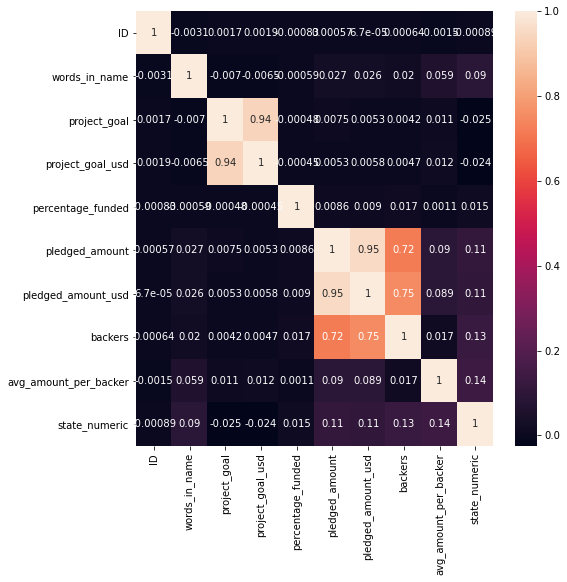

In [31]:
plt.figure(figsize=(8,8))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

### 2.1 (turn "success" to 1 and "fail" + "cancelled" to 0)

In [28]:
df['state_numeric'] = df['state']

In [29]:
df['state_numeric'] = df.state_numeric.map({"successful":1,
                                            "failed":0,
                                            "canceled":0
})

### 2.2 Create new DataFrames with only "failed", "successful", "cancelled" states

In [32]:
df_suc = df.loc[df['state'] == "successful"]
df_fail = df.loc[df['state'] == "failed"]
df_can = df.loc[df['state'] == "canceled"]

### 2.3 Do individual corr

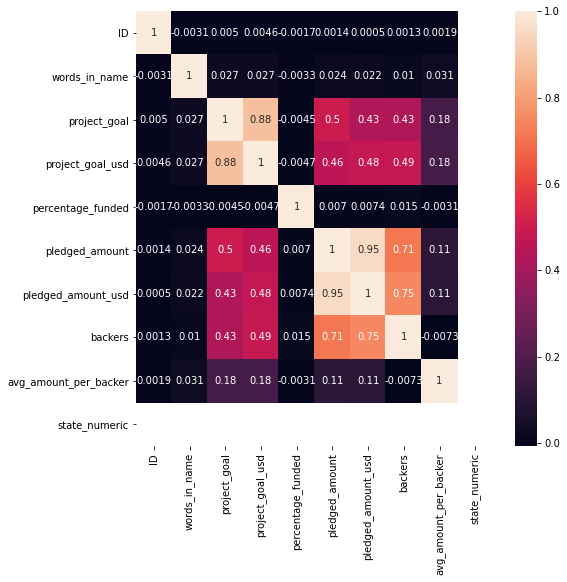

In [33]:
plt.figure(figsize=(8,8))
corrMatrix = df_suc.corr()
sns.heatmap(corrMatrix, annot=True)

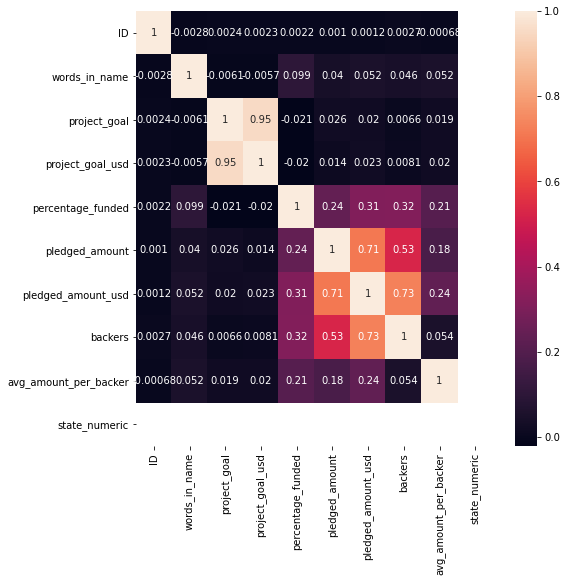

In [34]:
plt.figure(figsize=(8,8))
corrMatrix = df_fail.corr()
sns.heatmap(corrMatrix, annot=True)

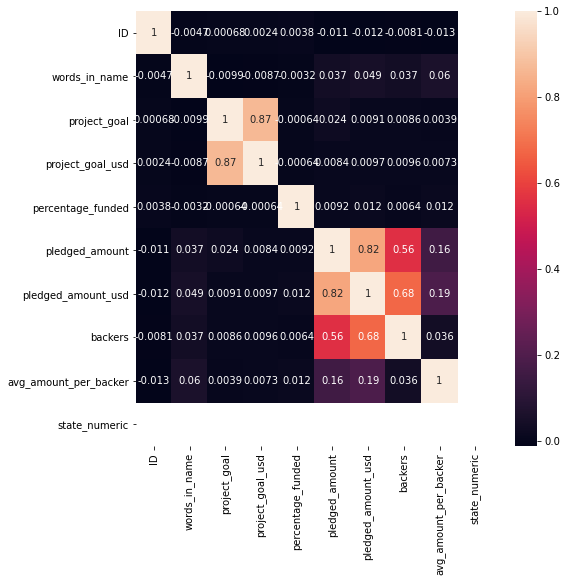

In [35]:
plt.figure(figsize=(8,8))
corrMatrix = df_can.corr()
sns.heatmap(corrMatrix, annot=True)

### 2.4 Group by main_category % of success = ?

In [36]:
cat_df = df.groupby("main_category").agg({"ID": "count", "state_numeric": "sum"})
cat_df["success_rate"] = cat_df["state_numeric"] / cat_df["ID"]
cat_df = cat_df.sort_values(by=["success_rate"])
cat_df

,ID,state_numeric,success_rate
main_category,,,
Technology,31765,6434.0,0.202550
Journalism,4672,1012.0,0.216610
Crafts,8661,2115.0,0.244198
Fashion,22425,5593.0,0.249409
Food,24265,6085.0,0.250773
Photography,10675,3305.0,0.309602
Publishing,39047,12300.0,0.315005
Design,29516,10550.0,0.357433
Games,34723,12518.0,0.360510


### 2.5 Compare project duration with project success

In [37]:
df["funding_period"] = df.funding_period.dt.days

##### Fixing funding_period Outliers manually

In [38]:
df["funding_period"].max()

14867

In [39]:
df.loc[df["funding_period"] == 14733]

,ID,project_name,words_in_name,main_category,category,country,currency,launched,deadline,funding_period,project_goal,project_goal_usd,percentage_funded,pledged_amount,pledged_amount_usd,state,backers,avg_amount_per_backer,state_numeric
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",16.0,Music,Music,United States,USD,1970-01-01 01:00:00,2010-05-04,14733,10000.0,10000.0,0.0,0.0,0.0,canceled,0,0.0,0.0


In [40]:
df = df.drop(273779)
df = df.drop(247913)
df = df.drop(75397)
df = df.drop(94579)
df = df.drop(48147)
df = df.drop(2842)

### 2.6 Is there seasonal effect on amount of money spent in Kickstarter

In [41]:
df["launch_month"] = df["launched"].dt.strftime("%m")

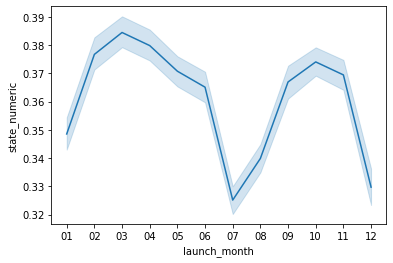

In [42]:
ax = sns.lineplot(x="launch_month", y="state_numeric", data=df)

In [84]:
df["launch_day"] = df["launched"].dt.strftime("%d")

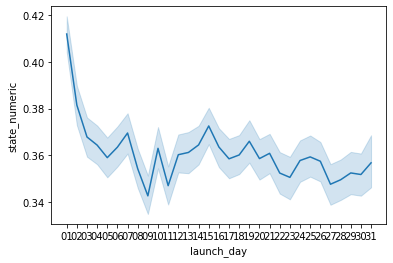

In [85]:
ax = sns.lineplot(x="launch_day", y="state_numeric", data=df)

In [86]:
df["launch_year"] = df["launched"].dt.strftime("%Y")

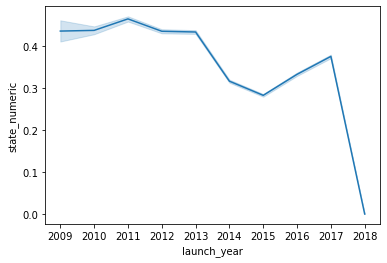

In [87]:
ax = sns.lineplot(x="launch_year", y="state_numeric", data=df)

### 2.7 What are the most used words in successful projects

Resetting indexes:

In [43]:
df_fail = df_fail.reset_index(drop=True)

In [44]:
df_suc = df_suc.reset_index(drop=True)

In [45]:
df_can = df_can.reset_index(drop=True)

In [46]:
pd.Series(' '.join(df_suc['project_name']).lower().split()).value_counts()[:60]

the            39259
-              21828
a              20569
of             14023
and             8874
for             8151
&               7226
to              7193
in              6709
new             6689
album           5553
film            5188
by              4742
project         3586
book            3433
your            2962
an              2961
with            2915
art             2902
short           2901
debut           2831
game            2779
first           2766
on              2705
music           2474
help            2439
from            2264
ep              1963
at              1878
is              1828
documentary     1671
|               1657
my              1625
you             1607
tour            1256
make            1249
series          1244
video           1243
album!          1241
about           1223
cards           1219
one             1195
cd              1171
festival        1166
record          1155
love            1140
world           1111
our          

##### What about failed projects

In [47]:
df_fail = df_fail.drop(86800)
df_fail = df_fail.drop(160317)
df_fail = df_fail.drop(176947)

In [48]:
df.dropna(subset = ["project_name"], inplace=True)

In [49]:
pd.Series(' '.join(df_fail['project_name']).lower().split()).value_counts()[:60]

the            50618
-              25300
a              23661
of             19067
and            13454
for            12679
to             11017
in              8894
&               8453
new             5480
project         5367
your            5032
with            4507
book            4291
film            4140
by              4123
game            3859
album           3832
my              3798
art             3781
on              3665
music           3508
an              3373
help            3047
first           2797
from            2651
you             2384
life            2352
is              2264
world           2151
app             2136
series          2129
video           1891
i               1835
documentary     1828
short           1758
love            1673
food            1657
one             1644
at              1596
story           1584
debut           1544
all             1496
our             1489
novel           1474
me              1413
|               1387
make         

##### What about cancelled projects

In [50]:
pd.Series(' '.join(df_can['project_name']).lower().split()).value_counts()[:50]

(canceled)     23099
the             9940
-               6094
a               4671
of              3760
for             2644
and             2497
to              2011
&               1831
in              1639
game            1447
your            1219
new             1037
with             981
project          972
by               841
film             791
book             747
first            670
an               662
on               660
my               655
album            609
art              606
music            569
help             546
you              523
|                473
from             469
card             444
world            438
life             432
app              412
is               400
cards            387
series           384
one              354
playing          340
short            334
video            327
:                322
i                319
documentary      311
at               308
novel            302
world's          298
all              292
make         

### 2.8 Funding goal negatively corr with campaign success

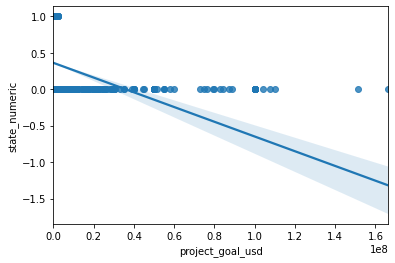

In [52]:
ax = sns.regplot(x="project_goal_usd", y="state_numeric", data=df)

### 2.9 Length of the campaign title negatively corr with campaign success

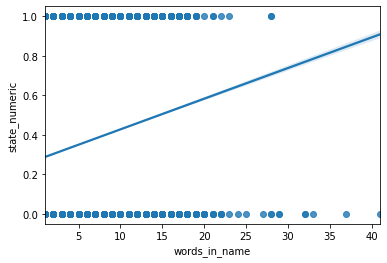

In [53]:
ax = sns.regplot(x="words_in_name", y="state_numeric", data=df)

**TA review:** 
do analysis excluding the 10-100 $ goals | 
or reached-  | 
compare goal vs reached | 
most backed projects are the same? - check | 
where do do I want to go with this? Set story! | 

Go to tableau and experiment

Define your story!

- Try sub categories and success rate
- Avg amount asked based on category
- Linear regression of categories
- Show year over year seasonality
- Non-normalized analysis of goal & state
- Goal vs Reached ammounts
- Additional analysis for the most funded projects

### 3.0 Creating a goal of 1000 table

In [54]:
df_big = df.loc[df['project_goal_usd'] > 1000]

### Exporting

In [55]:
df.to_csv('tables_for_tableau/df.csv', sep='\t')

In [56]:
df_suc.to_csv('tables_for_tableau/df_suc.csv', sep='\t')

In [57]:
df_fail.to_csv('tables_for_tableau/df_fail.csv', sep='\t')

In [58]:
df_can.to_csv('tables_for_tableau/df_can.csv', sep='\t')

In [59]:
df_big.to_csv('tables_for_tableau/df_big.csv', sep='\t')

In [60]:
cat_df.to_csv('tables_for_tableau/cat_df.csv', sep='\t')

### Overslimplifying for presentation

In [63]:
df_avg_state = df[['state', 'project_goal_usd']].copy()

In [65]:
df_avg_state.groupby('state').agg('mean')

,project_goal_usd
state,
canceled,75590.203205
failed,63174.495905
successful,9532.853357


In [66]:
63174.495905 / 9532.853357

6.62702902679299

Target goals of failed projects are 6 times higher on average than the ones of successful projects.

In [76]:
df.loc[df['pledged_amount_usd'] > 5000000]['ID'].count()

21

In [77]:
df.loc[df['pledged_amount_usd'] > 10000000]['ID'].count()

5

Out of 370,000 projects only 21 raised more than 5 million USD, roughly the population of Berlin Mitte.
only 5 raised more than 10 million USD.
Source: https://en.wikipedia.org/wiki/Mitte

In [83]:
cat_df

,ID,state_numeric,success_rate
main_category,,,
Technology,31765,6434.0,0.202550
Journalism,4672,1012.0,0.216610
Crafts,8661,2115.0,0.244198
Fashion,22425,5593.0,0.249409
Food,24265,6085.0,0.250773
Photography,10675,3305.0,0.309602
Publishing,39047,12300.0,0.315005
Design,29516,10550.0,0.357433
Games,34723,12518.0,0.360510


In [89]:
df_cat_goal = df[['main_category', 'project_goal_usd']].copy()

In [90]:
df_cat_goal.groupby('main_category').agg('mean')

,project_goal_usd
main_category,
Art,39468.661861
Comics,19675.773316
Crafts,10423.092597
Dance,9408.592117
Design,42200.736692
Fashion,22530.494784
Film & Video,82376.351240
Food,48661.356201
Games,45149.451269


Dance (62%), Theater (60%), and Comics (54%) of success rate (Goal & Popularity)
Technology (20%), Crafts (21%), Journalism (24%) of success rate.